DADOS EM https://www.kaggle.com/datasets/priyamchoksi/credit-card-transactions-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sea
import plotly.express as px
from datetime import datetime, date
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
cd= pd.read_csv(r'C:\Users\llcor\OneDrive\Área de Trabalho\DadosKaggle\credit_card_transactions.csv')
cd.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


CONHECENDO O DATASET

In [3]:
cd.shape

(1296675, 24)

- Verifica-se que o dataset tem 1.296.675 linhas
- São 24 colunas, com variáves que contêm informações sobre as transações, dados dos titulares do cartão, do comério, etc. 

In [4]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

#### Tratamento dos dados

- para facilitar a compreensão e o tratamento dos dados, vou iniciar por traduzir as colunas

In [5]:
cd.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode'],
      dtype='object')

In [6]:
cd =cd.rename(columns={'Unnamed: 0' : 'id', 
                        'trans_date_trans_time' : 'data_hr_trans', 
                        'cc_num':'num_cartao', 
                        'merchant':'comercio', 
                        'category':'categoria',
                        'amt': 'valor_trans', 
                        'first':'primeiro_nome', 
                        'last':'ultimo_nome', 
                        'gender':'genero', 
                        'street':'endereco', 
                        'city':'cidade', 
                        'state':'estado', 
                        'zip':'cep',
                        'lat':'lat', 
                        'long':'long', 
                        'city_pop':'populacao_cidade', 
                        'job':'ocupacao_titular', 
                        'dob' :'data_nasc', 
                        'trans_num':'num_trans', 
                        'unix_time':'id_data_hr_trans',
                        'merch_lat':'lat_comercio', 
                        'merch_long':'long_comercio', 
                        'is_fraud':'indicador_fraude', 
                        'merch_zipcode':'cep_comercio'})


In [7]:
cd.head()

,id,data_hr_trans,num_cartao,comercio,categoria,valor_trans,primeiro_nome,ultimo_nome,genero,endereco,...,long,populacao_cidade,ocupacao_titular,data_nasc,num_trans,id_data_hr_trans,lat_comercio,long_comercio,indicador_fraude,cep_comercio
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [8]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1296675 non-null  int64  
 1   data_hr_trans     1296675 non-null  object 
 2   num_cartao        1296675 non-null  int64  
 3   comercio          1296675 non-null  object 
 4   categoria         1296675 non-null  object 
 5   valor_trans       1296675 non-null  float64
 6   primeiro_nome     1296675 non-null  object 
 7   ultimo_nome       1296675 non-null  object 
 8   genero            1296675 non-null  object 
 9   endereco          1296675 non-null  object 
 10  cidade            1296675 non-null  object 
 11  estado            1296675 non-null  object 
 12  cep               1296675 non-null  int64  
 13  lat               1296675 non-null  float64
 14  long              1296675 non-null  float64
 15  populacao_cidade  1296675 non-null  int64  
 16  

- Variáveis numéricas: id, num_cartao, valor_trans, cep, lat, long, populacao_cidade, id_data_hr_trans, lat_comercio, long_comercio, indicador_fraude, cep_comercio
- Variáveis categóricas: data_hr_trans...

Verifiquei que variáveis como id, num_cartao, cep, cep, lat, long,  id_data_hr_trans, lat_comercio, long_comercio, indicador_fraude, cep_comercio, identificadas pelo python como númericas deverão ser transformadas em categóricas a depender das análises 

VALORES AUSENTES - MISSING VALUES

In [9]:
valores_aus = (cd.isna().sum()) 
valores_aus

id                       0
data_hr_trans            0
num_cartao               0
comercio                 0
categoria                0
valor_trans              0
primeiro_nome            0
ultimo_nome              0
genero                   0
endereco                 0
cidade                   0
estado                   0
cep                      0
lat                      0
long                     0
populacao_cidade         0
ocupacao_titular         0
data_nasc                0
num_trans                0
id_data_hr_trans         0
lat_comercio             0
long_comercio            0
indicador_fraude         0
cep_comercio        195973
dtype: int64

In [10]:
valores_ausentes_perc = valores_aus[valores_aus>0]/cd.shape[0]
print(f'{valores_ausentes_perc * 100} %')

cep_comercio    15.113502
dtype: float64 %


- A única variável que tem valores ausentes é o CEP (195.973 valores ausentes). O que não deve atrapalhar nas análises. 

VALORES DUPLICADOS 

In [11]:
cd.duplicated().sum()

0

- Nenhum valor duplicado foi identificado 

TRATANDO DADOS DATETIME
- foi verificado que as váriáveis de data e hora estavam em formatos não adequados, por isso, decidi transforma-las em tipo datetime

In [12]:
cd['data_hr_trans'] = pd.to_datetime(cd['data_hr_trans'], errors='coerce')
cd['data_nasc'] = pd.to_datetime(cd['data_nasc'], errors='coerce')

In [13]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   id                1296675 non-null  int64         
 1   data_hr_trans     1296675 non-null  datetime64[ns]
 2   num_cartao        1296675 non-null  int64         
 3   comercio          1296675 non-null  object        
 4   categoria         1296675 non-null  object        
 5   valor_trans       1296675 non-null  float64       
 6   primeiro_nome     1296675 non-null  object        
 7   ultimo_nome       1296675 non-null  object        
 8   genero            1296675 non-null  object        
 9   endereco          1296675 non-null  object        
 10  cidade            1296675 non-null  object        
 11  estado            1296675 non-null  object        
 12  cep               1296675 non-null  int64         
 13  lat               1296675 non-null  float6

- me chamou a atenção a quantidade de transações no inicio em Janeiro, então decidi investigar

In [14]:
cd['ano_trans'] = cd['data_hr_trans'].dt.year
cd['mes_trans'] = cd['data_hr_trans'].dt.strftime('%m')
cd['dia_trans'] = cd['data_hr_trans'].dt.strftime('%d')
cd['dia_mes_trans'] = cd['mes_trans'] + '-' + cd['mes_trans']

In [15]:
contagem = cd['dia_mes_trans'].value_counts()

<Axes: xlabel='dia_mes_trans'>

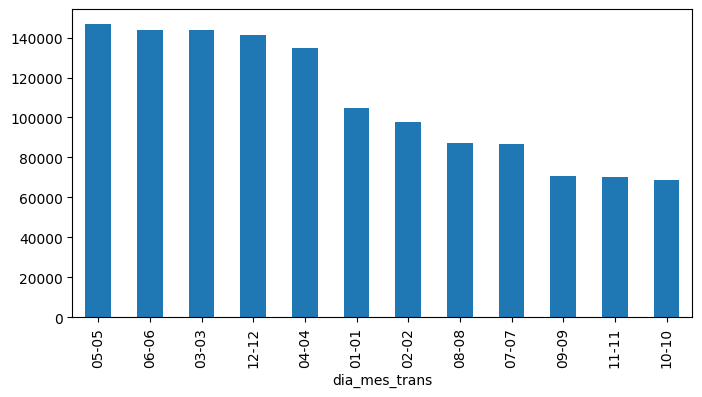

In [16]:
plt.figure(figsize=(8, 4))
contagem.plot(kind='bar')

- apesar de uma grande quantidade de transações no dia 1, ele não é o dia com mais transações 

Criando e analisando informações sobre idade

In [17]:
cd['idade'] = cd['data_hr_trans'].dt.year - cd['data_nasc'].dt.year 
cd['idade'].unique()

array([31, 41, 57, 52, 33, 58, 26, 72, 78, 45, 29, 53, 30, 74, 54, 67, 81,
       73, 39, 48, 55, 42, 49, 35, 21, 32, 77, 47, 59, 65, 25, 43, 38, 93,
       83, 22, 64, 36, 40, 19, 62, 37, 84, 44, 24, 92, 91, 69, 61, 68, 34,
       18, 90, 56, 71, 51, 46, 60, 20, 16, 50, 88, 79, 85, 27, 80, 66, 63,
       15, 14, 82, 86, 23, 75, 28, 70, 76, 89, 87, 95, 94, 96, 17])

In [18]:
bins = [0,20,30,40,50,60,100]
labels = ['0-20','20-30', '30-40', '40-50', '50-60', '60+']
cd['faixa_id'] = pd.cut(x=cd['idade'], bins=bins, labels=labels, right=True)


<Axes: xlabel='count', ylabel='faixa_id'>

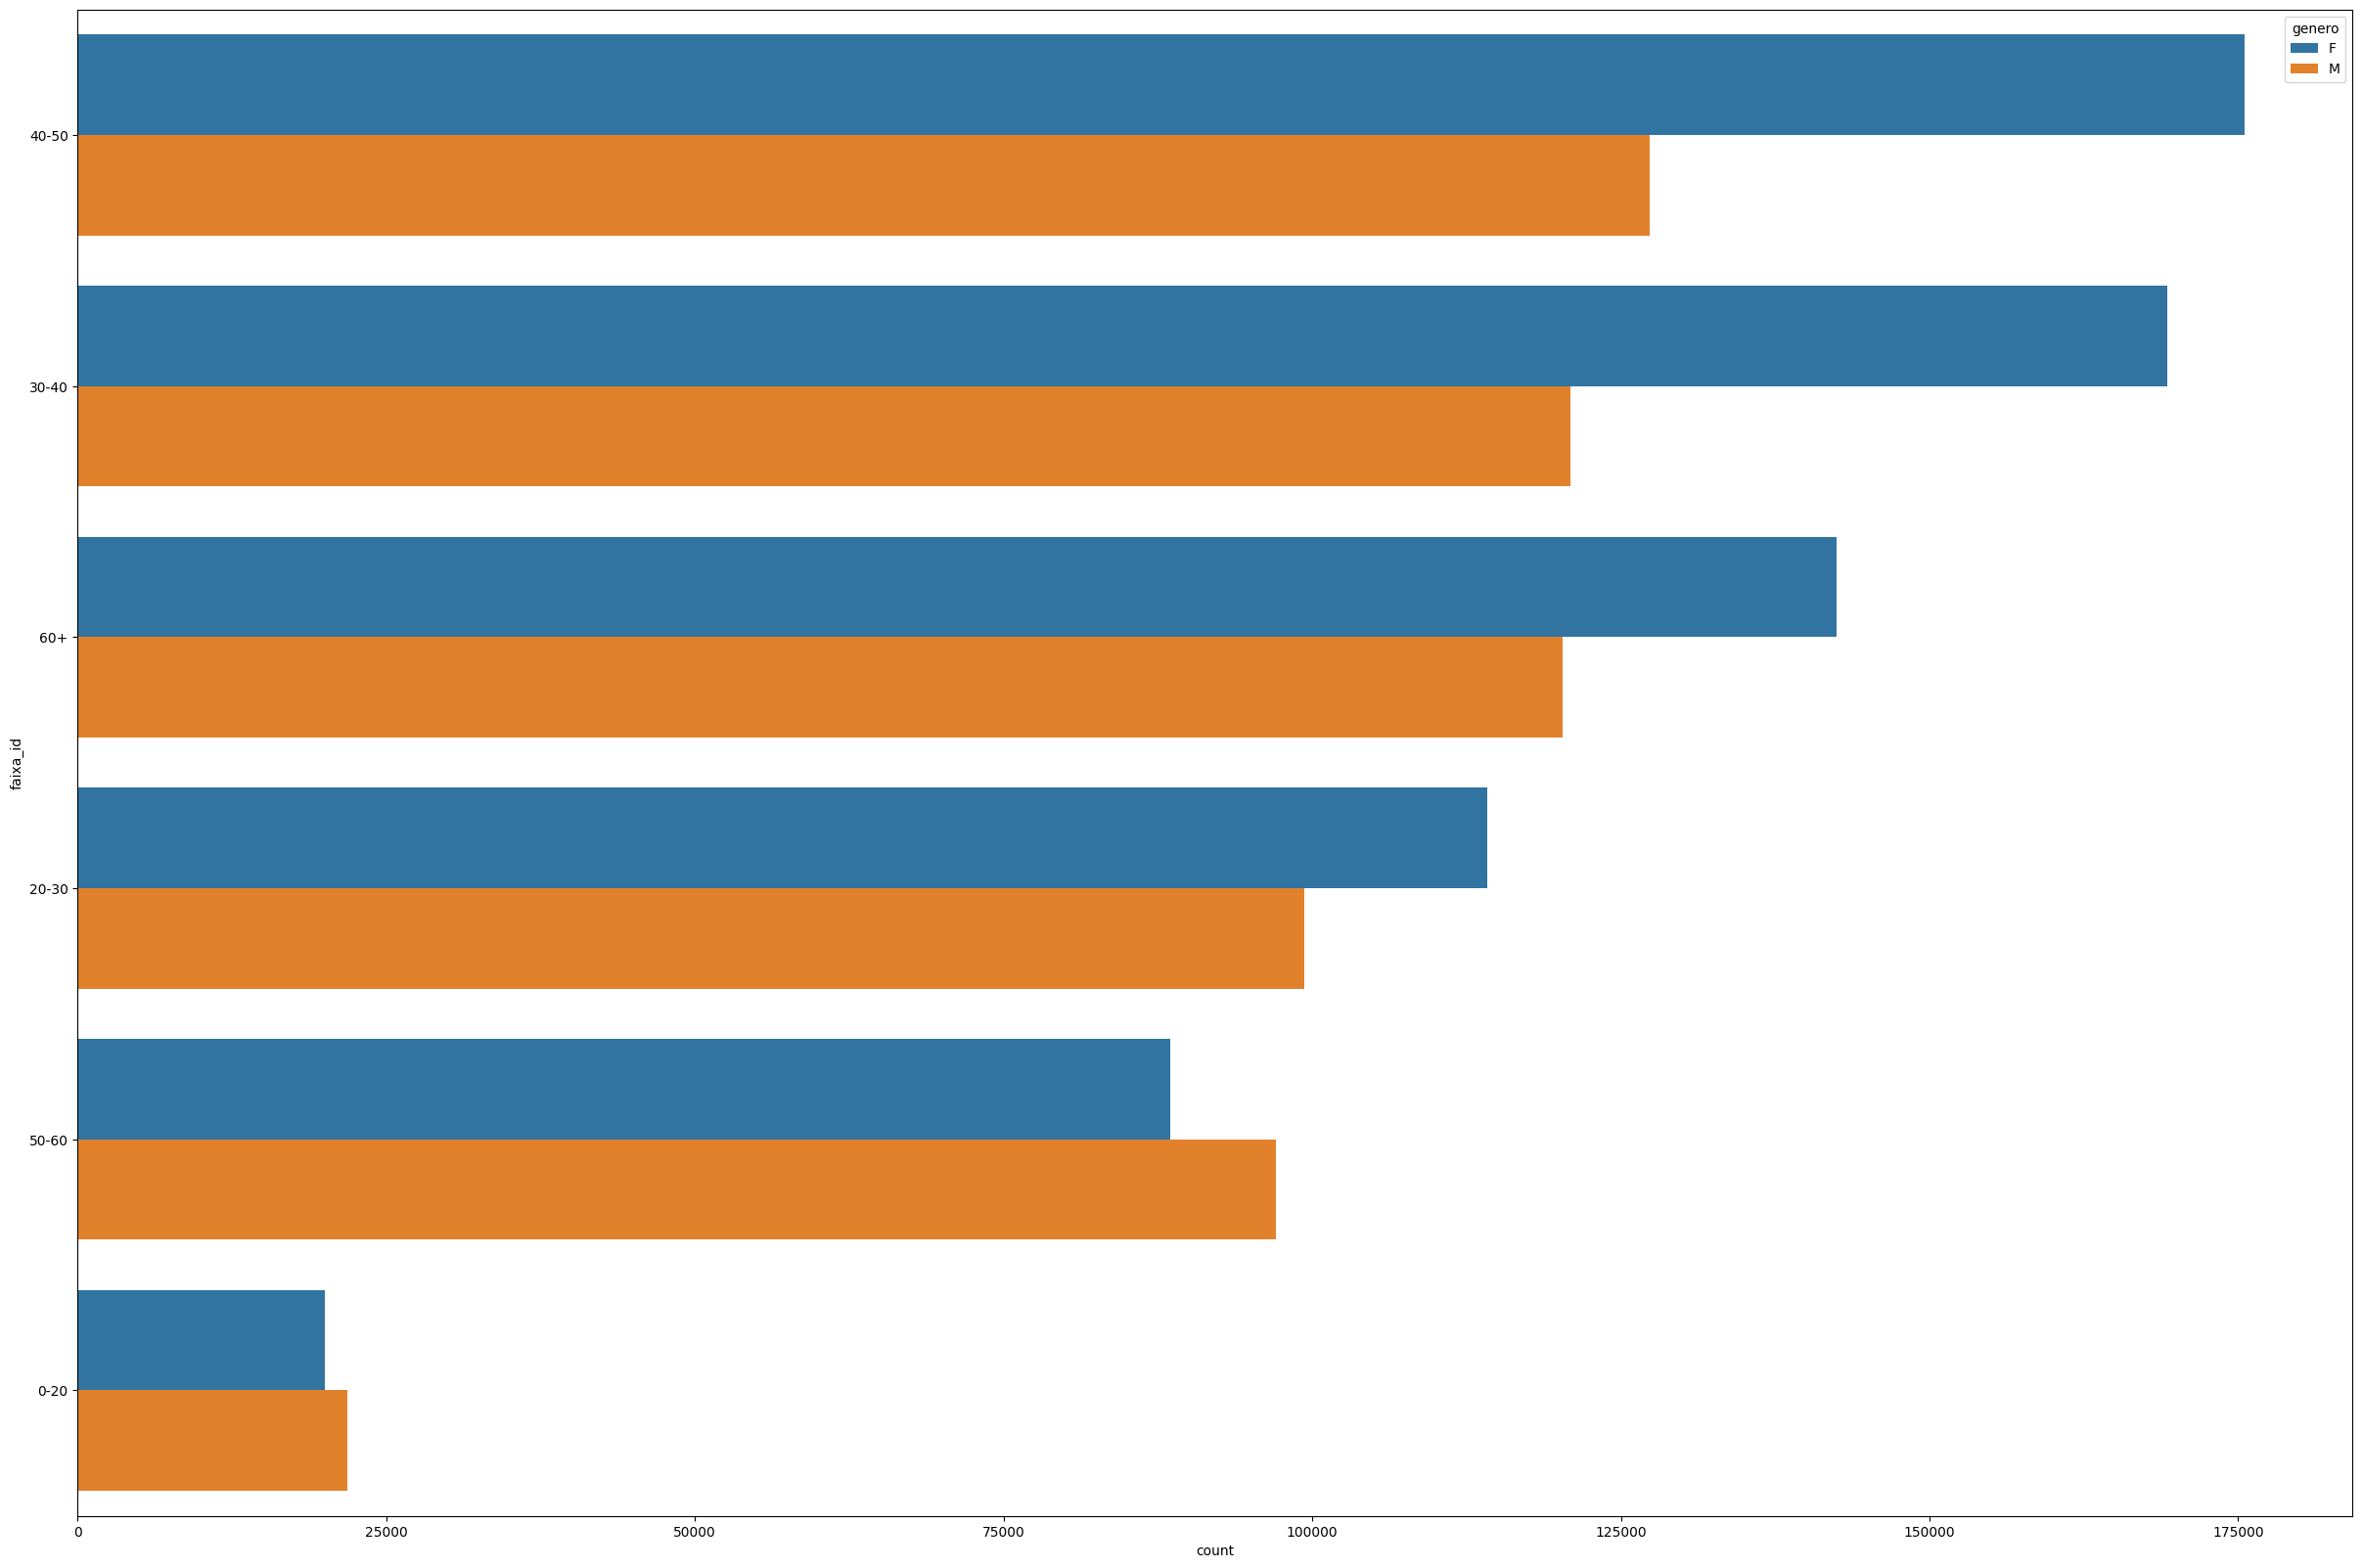

In [44]:
plt.figure(figsize=(30,20))
sea.countplot(cd, y='faixa_id', order = cd['faixa_id'].value_counts().index, hue ='genero')

- a maior parte das transações foram realizadas por pessoas na faixa etária de 30 a 40 e 40 a 50
- hommens entre 0 e 20 anos e 50 e 60 anos realizaram mais transações do que mulheres 

<Axes: xlabel='categoria', ylabel='count'>

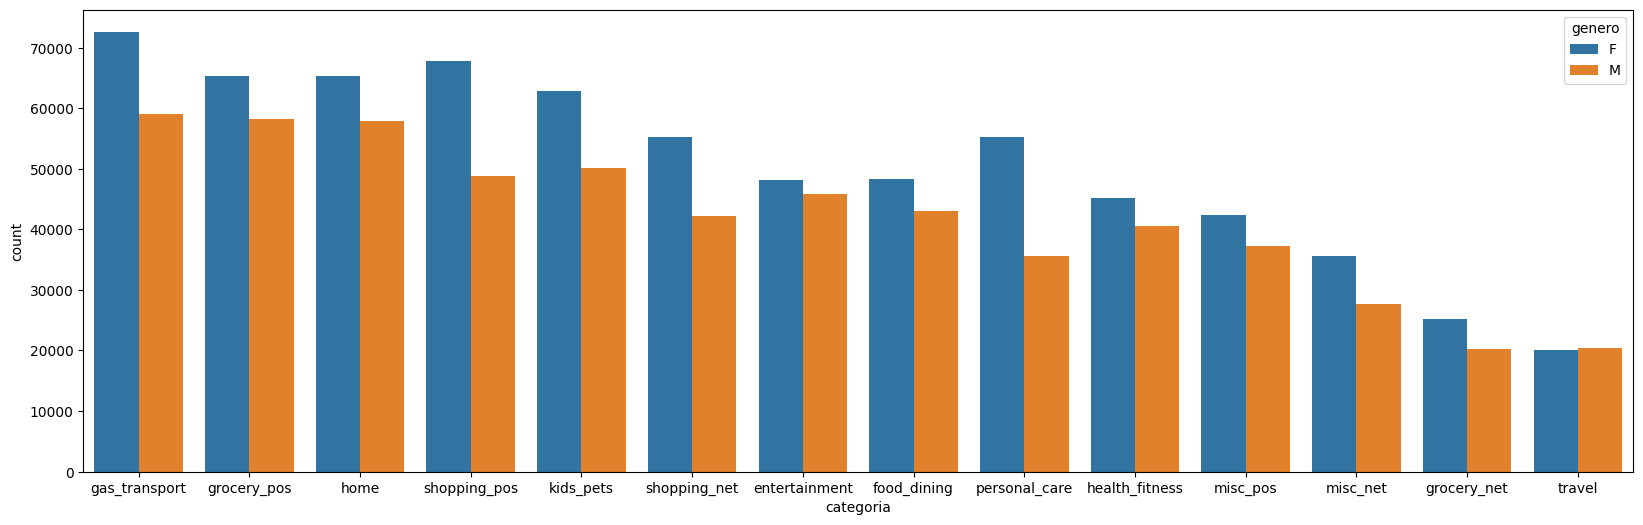

In [20]:
plt.figure(figsize=(20,6))
sea.countplot(cd, x='categoria', order=cd['categoria'].value_counts().index, hue='genero')

In [21]:
pd.set_option('display.float_format', '{:.2f}'.format)


Informações úteis continuidade da análise
- Médida das transações foram de 70.35, sendo que, a máximo foi de 28.948,90, ou seja, os valores estão relativamente dispersos. 

Por isso, passo agora, a analisar os outliers da variável Valor da Transação 

In [22]:
cd.describe()

,id,data_hr_trans,num_cartao,valor_trans,cep,lat,long,populacao_cidade,data_nasc,id_data_hr_trans,lat_comercio,long_comercio,indicador_fraude,cep_comercio,ano_trans,idade
count,1296675.00,1296675,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675,1296675.00,1296675.00,1296675.00,1296675.00,1100702.00,1296675.00,1296675.00
mean,648337.00,2019-10-03 12:47:28.070214144,417192042079726656.00,70.35,48800.67,38.54,-90.23,88824.44,1973-10-03 19:02:55.017178512,1349243636.73,38.54,-90.23,0.01,46825.75,2019.29,46.03
min,0.00,2019-01-01 00:00:18,60416207185.00,1.00,1257.00,20.03,-165.67,23.00,1924-10-30 00:00:00,1325376018.00,19.03,-166.67,0.00,1001.00,2019.00,14.00
25%,324168.50,2019-06-03 19:12:22.500000,180042946491150.00,9.65,26237.00,34.62,-96.80,743.00,1962-08-13 00:00:00,1338750742.50,34.73,-96.90,0.00,25114.00,2019.00,33.00
50%,648337.00,2019-10-03 07:35:47,3521417320836166.00,47.52,48174.00,39.35,-87.48,2456.00,1975-11-30 00:00:00,1349249747.00,39.37,-87.44,0.00,45860.00,2019.00,44.00
75%,972505.50,2020-01-28 15:02:55.500000,4642255475285942.00,83.14,72042.00,41.94,-80.16,20328.00,1987-02-22 00:00:00,1359385375.50,41.96,-80.24,0.00,68319.00,2020.00,57.00
max,1296674.00,2020-06-21 12:13:37,4992346398065154048.00,28948.90,99783.00,66.69,-67.95,2906700.00,2005-01-29 00:00:00,1371816817.00,67.51,-66.95,1.00,99403.00,2020.00,96.00
std,374317.97,NaN,1308806447000789248.00,160.32,26893.22,5.08,13.76,301956.36,NaN,12841278.42,5.11,13.77,0.08,25834.00,0.45,17.38


In [23]:
cd['id'].value_counts().unique()

array([1], dtype=int64)

GRÁFICO DE DENSIDADE - VALOR DA TRANSAÇÃO

<Axes: xlabel='valor_trans', ylabel='Density'>

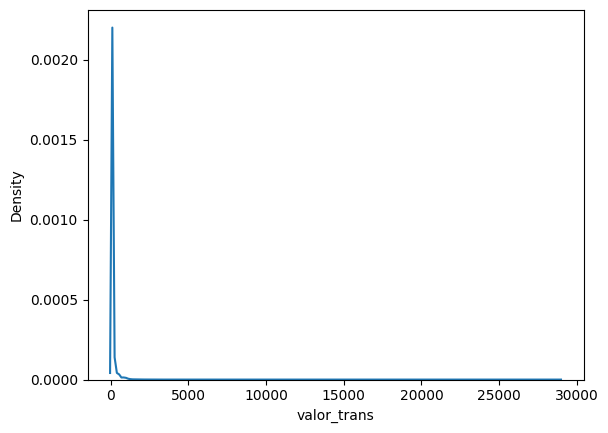

In [24]:
sea.kdeplot(data=cd, x='valor_trans')

BOXPLOT - VALOR DA TRANSAÇÃO

<Axes: ylabel='valor_trans'>

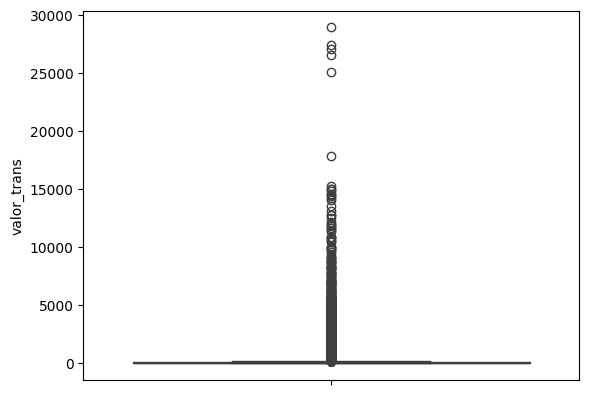

In [25]:
sea.boxplot(cd['valor_trans'])

In [26]:
cd.columns

Index(['id', 'data_hr_trans', 'num_cartao', 'comercio', 'categoria',
       'valor_trans', 'primeiro_nome', 'ultimo_nome', 'genero', 'endereco',
       'cidade', 'estado', 'cep', 'lat', 'long', 'populacao_cidade',
       'ocupacao_titular', 'data_nasc', 'num_trans', 'id_data_hr_trans',
       'lat_comercio', 'long_comercio', 'indicador_fraude', 'cep_comercio',
       'ano_trans', 'mes_trans', 'dia_trans', 'dia_mes_trans', 'idade',
       'faixa_id'],
      dtype='object')

GÁFICO DE DISPERSÃO - CATEGORIAS X VALOR DA TRANSAÇÃO 

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000.]),
 [Text(-5000.0, 0, '−5000'),
  Text(0.0, 0, '0'),
  Text(5000.0, 0, '5000'),
  Text(10000.0, 0, '10000'),
  Text(15000.0, 0, '15000'),
  Text(20000.0, 0, '20000'),
  Text(25000.0, 0, '25000'),
  Text(30000.0, 0, '30000'),
  Text(35000.0, 0, '35000')])

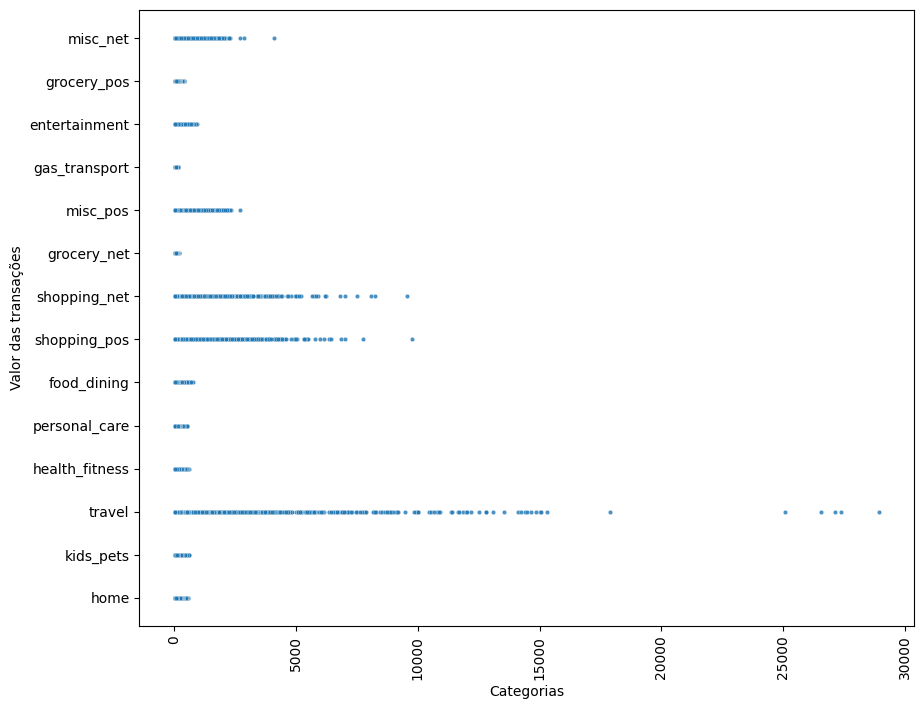

In [42]:
plt.figure(figsize=(10, 8))  # Altere esses valores conforme necessário
sea.scatterplot(data=cd, x='valor_trans', y="categoria", s=10, alpha=0.8)
plt.xlabel('Categorias', fontsize=10)  # Tamanho do rótulo do eixo x
plt.ylabel('Valor das transações', fontsize=10)  # Tamanho do rótulo do eixo x

plt.tick_params(axis='both', which='both', labelsize=10)  # Ajusta o tamanho das etiquetas dos eixos
plt.xticks(rotation=90)  # Rótulos do eixo x na vertical



In [ ]:
#Identificação de outliers atavés do método do IQR

Q1 = cd['valor_trans'].quantile(0.25)
Q3 = cd['valor_trans'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [ ]:
df_sem_outliers = cd[(cd['valor_trans'] >= lower_bound) & (cd['valor_trans'] <= upper_bound)]
df_sem_outliers.head()


,id,data_hr_trans,num_cartao,comercio,categoria,valor_trans,primeiro_nome,ultimo_nome,genero,endereco,...,lat_comercio,long_comercio,indicador_fraude,cep_comercio,ano_trans,mes_trans,dia_trans,dia_mes_trans,idade,faixa_id
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.01,-82.05,0,28705.00,2019,01,01,01-01,31,30-40
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,49.16,-118.19,0,NaN,2019,01,01,01-01,41,40-50
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,47.03,-112.56,0,NaN,2019,01,01,01-01,52,50-60
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.67,-78.63,0,22844.00,2019,01,01,01-01,33,30-40
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.65,-76.15,0,17972.00,2019,01,01,01-01,58,50-60


- Após a verificar o exesso de outliers na variável Valor da transação, decidi, por pernancer com todos os valores, tendo em vista que o objetivo principal da análise é o comportamento de compras 